# SP_001 - Indian Diabetes Preview

# Basic Setups

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display     import HTML
import seaborn as sns
import pickle
%matplotlib inline 
# para criar os gráficos dentro do notebook
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

## Helping functions

In [2]:
#jupyter notebook settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

Populating the interactive namespace from numpy and matplotlib


# Data overview

## Data Load

In [3]:
df_raw = pd.read_csv(r'../data/raw/diabetes.csv')

In [4]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


Task
1) Change the columns names

## Check NaN

In [6]:
df_raw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Check data types

In [7]:
df_raw.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Check attributes

### Atributte 'Pregnancies'

In [8]:
# number of times pregnant
df_raw['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

### Atributte 'Glucose'

In [9]:
#plasma glucose concentration
df_raw['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [10]:
df_raw[df_raw['Glucose'] == 0].shape[0]

5

### Atributte 'BloodPressure'

In [11]:
df_raw['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [12]:
df_raw[df_raw['BloodPressure'] == 0].shape[0]

35

### Atributte 'SkinThickness'

In [13]:
df_raw['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [14]:
df_raw[df_raw['SkinThickness'] == 0].shape[0]

227

### Atributte 'Insulin' 

In [15]:
df_raw['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

### Atributte'BMI'

In [16]:
df_raw['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [17]:
df_raw[df_raw['BMI'] == 0 ].shape[0]

11

### Atributte 'DiabetesPedigreeFunction'

In [18]:
df_raw['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

### Atributte 'Age'

In [19]:
df_raw['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

### Atributte 'Outcome'

In [20]:
df_raw['Outcome'].unique()

array([1, 0], dtype=int64)

# Data Preparing

In [21]:
df3 = df_raw.copy()

## Rename columns

In [22]:
new_cols =[ 'pregnancies', 'glucose', 'blood_press', 'skin_thick', 'insulin','bmi', 'diabetes_pedigree', 'age', 'outcome']
df3.columns = new_cols

# Exploratory data analysis

In [23]:
df4 = df3.copy()

In [24]:
num_true  = df4[df4['outcome'] == 1].shape[0]
num_false = df4[df4['outcome'] == 0].shape[0]

In [25]:
print ('The number of true cases in the dataset is {}'.format(num_true))
print ('The number of false cases in the dataset is {}'.format(num_false))

The number of true cases in the dataset is 268
The number of false cases in the dataset is 500


In [26]:
def plot_corr (df, size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

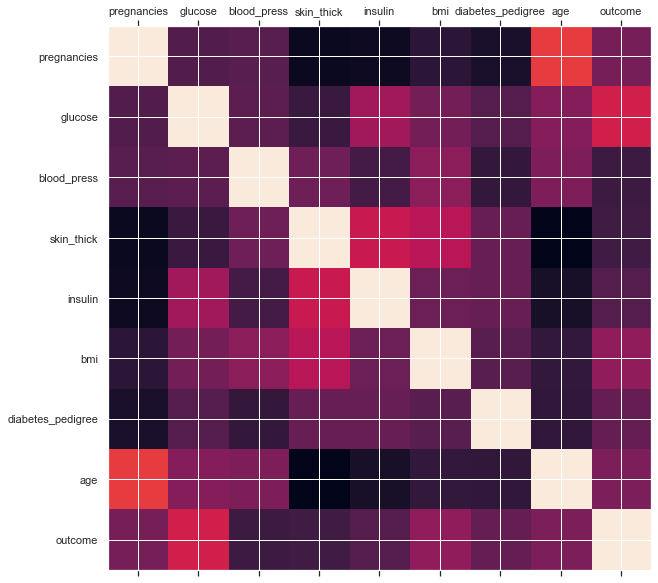

In [27]:
plot_corr(df3)

# Applying ML

In [28]:
df5 = df4.copy()

### Feature selection

In [29]:
attributes = ['pregnancies', 'glucose', 'blood_press', 'skin_thick', 'insulin', 'bmi', 'diabetes_pedigree', 'age']
output_attribute = ['outcome']

In [30]:
X = df5[attributes].values
Y = df5[output_attribute].values

## Splitting dataframe

In [31]:
split_test_size = 0.30

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split ( X, Y, test_size = split_test_size , random_state = 42)

In [33]:
print ('{:.2F} % of data for train'. format ( ( len(X_train) / df5.shape[0] ) * 100 ) )
print ('{:.2F} % of data for test'.  format ( ( len(X_test ) / df5.shape[0] ) * 100 ) )

69.92 % of data for train
30.08 % of data for test


In [34]:
full_zeros = SimpleImputer (missing_values = 0, strategy = 'mean')
X_train = full_zeros.fit_transform(X_train)
X_test = full_zeros.fit_transform(X_test)

## Gaussian Navie Bayes

In [51]:
model_v1 = GaussianNB() #create an object of classification algorithm

In [52]:
# training model 
model_v1.fit(X_train , Y_train.ravel()) # rave to adjust the shape

GaussianNB()

### Checking the accuracy

In [56]:
nb_predict_test = model_v1.predict(X_test)
print('Accuracy (test): {:.4f}'.format(metrics.accuracy_score(Y_test, nb_predict_test  )))

Accuracy (test): 0.7359


In [57]:
# confusion matrix
print('Confusion Matrix')
print ('{0}'.format(metrics.confusion_matrix (Y_test, nb_predict_test, labels = [1,0])))

Confusion Matrix
[[ 52  28]
 [ 33 118]]


In [58]:
print('Classification Report')
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [59]:
model_v2 = RandomForestClassifier (random_state = 42)
model_v2.fit (X_train , Y_train.ravel())

RandomForestClassifier(random_state=42)

In [60]:
rf_predict_test  = model_v2.predict(X_test)
print('Accuracy (test): {:.4f}' .format(metrics.accuracy_score(Y_test, rf_predict_test)))

Accuracy (test): 0.7403


In [61]:
# confusion matrix
print('Confusion Matrix')
print ('{0}'.format(metrics.confusion_matrix (Y_test, rf_predict_test, labels = [1,0])))

Confusion Matrix
[[ 52  28]
 [ 32 119]]


### Checking the accuracy

In [62]:
print('Classification Report')
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression

In [64]:
model_v3 = LogisticRegression( C= 0.7 , random_state =  42)
model_v3.fit ( X_train, Y_train.ravel())
lr_predict_test = model_v3.predict(X_test)

C:\Users\lelos\anaconda3\envs\Study\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Checking the accuracy

In [68]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(Y_test, lr_predict_test)))

Accuracy: 0.7489


In [69]:
print('Classification Report')
print(metrics.classification_report(Y_test, lr_predict_test, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [72]:
filename = r'..\models\training_model_v1.sav'
pickle.dump (model_v3, open(filename, 'wb'))